In [1]:
from lib import FrameworkOutput, DataLoader, modelLSTM, modelLR, modelProphet, mergeResults
import logging
logging.getLogger('prophet').setLevel(logging.WARNING) 
import warnings
warnings.filterwarnings('ignore')

logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

c:\Users\adil.ahmed\Miniconda3\envs\Prophet-Test\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [6]:
#file path for the dataset
INPUT_PATH = 'Foundation.csv'

#change this for each run as it creates a dir with this name
OUTPUT_PATH = 'run_1'

#the models you want to fit. This list should at least have one model
MODEL_TYPES = ['Linear_Regression','Prophet','LSTM']

run = FrameworkOutput(
    input_file= INPUT_PATH, output_path = OUTPUT_PATH, model_types = MODEL_TYPES
)

Making directories


In [7]:

#specify date and target columns
DATE_COL = 'date'
TARGET_COL = 'Sales'
#specify columns that are numerical
NUMERICAL_COLS = ['average_rating',	'google_shopping',	'google_trends',	'penetration_score',	'real_volume',	'review_count']

#specify scaler type: 'minmax' or 'standard'
SCALER = 'minmax'
SCALE_TARGET = True

#specify the number of lag steps you want; must match date column granularity 
LAG_STEPS = 2

#OPTIONAL: if you want to remove any columns from the dataframe, pass them here
REMOVE_COLS = ['Jan', 'Feb','Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

juices = DataLoader(
                    output_path= run.output_path, #do not change
                    filePath=run.input_file,
                    date_col=DATE_COL,
                    target_col=TARGET_COL,
                    numerical_cols=NUMERICAL_COLS,
                    scaler_type=SCALER,
                    scale_target=SCALE_TARGET,
                    lag_steps=LAG_STEPS,
                    remove_cols=REMOVE_COLS)

Scaling data
Numerical columns scaled
Scaling the target
Preparing data for Linear_Regression
Splitting data for Linear regression
Training samples:  50
Testing samples:  13
Number of features:  23
run_1
Preparing data for Prophet
Splitting data for Prophet
Preparing data for LSTM


In [12]:
#you can change the parameters inside except the output_path and df_LSTM

LSTMModel = modelLSTM(
    output_path = run.output_path, #DO NOT CHANGE
    df_LSTM = juices.df_LSTM, #DO NOT CHANGE
    max_neurons = 100, 
    min_neurons = 20, 
    max_layers = 1,
    forecast_timesteps = [3],
    past_timesteps= [12]
    )

Training 4 models
1/1 [==============================] - 0s 376ms/step
1 of 4 trained. So far, the best model is None with a mape of 100.
1/1 [==============================] - 0s 268ms/step
2 of 4 trained. So far, the best model is LSTM_2 with a mape of 51.36617137881143.
1/1 [==============================] - 0s 240ms/step
3 of 4 trained. So far, the best model is LSTM_2 with a mape of 51.36617137881143.
1/1 [==============================] - 0s 238ms/step
4 of 4 trained. So far, the best model is LSTM_4 with a mape of 43.1654777373915.


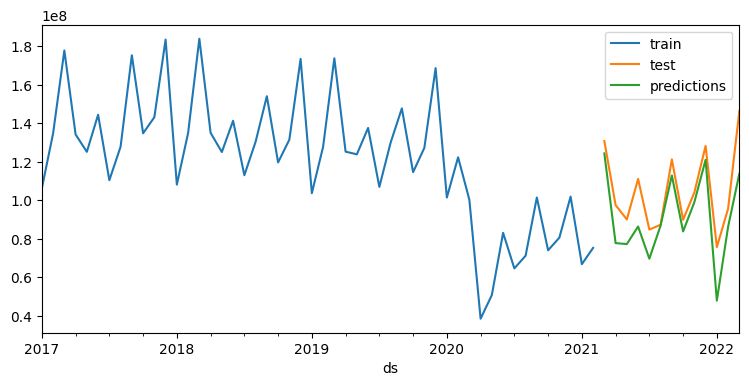

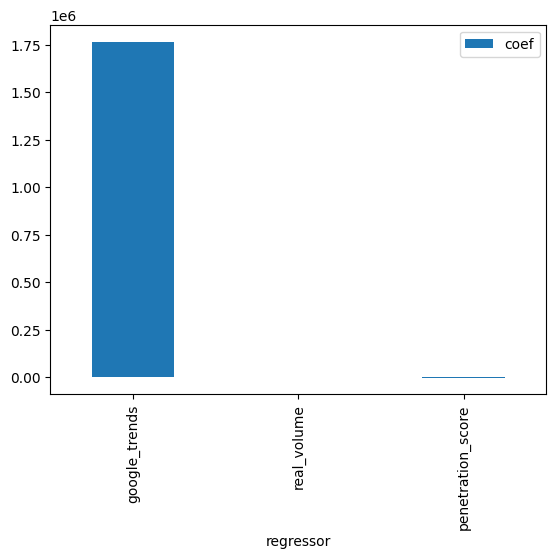

In [4]:
prophetModels = modelProphet(run.output_path,juices.df_train_FB,juices.df_test_FB)

Doing feature combinations


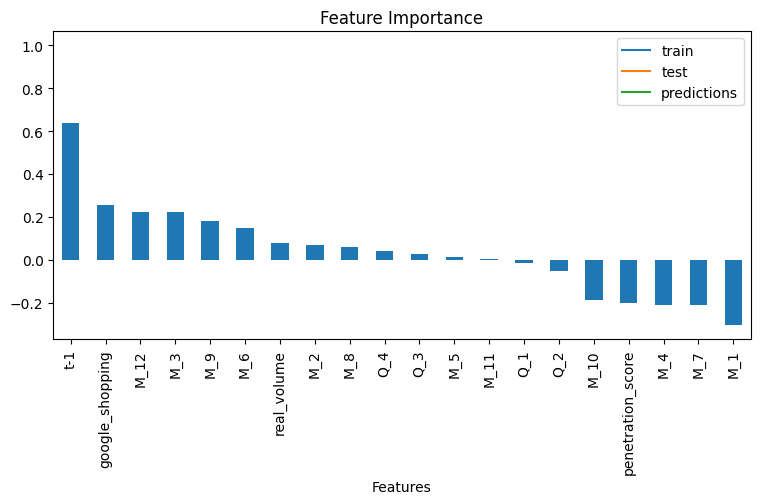

In [5]:
LR = modelLR(
    output_path=run.output_path,
    df_LR = juices.df_LR,
    X_train = juices.X_train,y_train = juices.y_train,
    X_test = juices.X_test,y_test = juices.y_test,
    original_features = juices.original_features,
    lag_features = juices.lag_features,
    datetime_features = juices.datetime_features)